In [1]:
import gym 
import random

In [2]:
env = gym.make('Breakout-v0')
height, width, channels = env.observation_space.shape
actions = env.action_space.n


In [3]:
state_size = env.observation_space.shape
print("Action size ", actions)
print("State size ", state_size)

Action size  4
State size  (210, 160, 3)


In [4]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [5]:
print('states high value:')
print(env.observation_space.high[0])
print(env.observation_space.high[1])
print(env.observation_space.high[2])
print(env.observation_space.high[3])

print('states low value:')
print(env.observation_space.low[0])
print(env.observation_space.low[1])
print(env.observation_space.low[2])
print(env.observation_space.low[3])



states high value:
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 

In [6]:

from baselines.common.atari_wrappers import make_atari, wrap_deepmind
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
total_episodes = 50000        # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode
learning_rate = 0.5           # Learning rate (Alpha)
gamma = 0.9                   # Discounting rate (Gamma)

# Exploration parameters
epsilon = 1.0                 # Exploration rate (Epsilon)
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.01             # Exponential decay rate for exploration prob

In [8]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1,2,3])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:0.0
Episode:2 Score:0.0
Episode:3 Score:2.0
Episode:4 Score:2.0
Episode:5 Score:0.0


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
import numpy as np

In [16]:
def build_model(height, width, channels, actions):
    model = Sequential()
    model.add(Convolution2D(32, (8,8), strides=(4,4), activation='relu', input_shape=(3,height, width, channels)))
    model.add(Convolution2D(64, (4,4), strides=(2,2), activation='relu'))
    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [17]:
model = build_model(height, width, channels, actions)

In [18]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy


In [19]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    return dqn

In [20]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-4))
dqn.fit(env, nb_steps=1100, visualize=False, verbose=2)

Training for 1100 steps ...


C:\Users\16371\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


  190/1100: episode: 1, duration: 9.460s, episode steps: 190, steps per second:  20, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.537 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  429/1100: episode: 2, duration: 11.862s, episode steps: 239, steps per second:  20, episode reward:  1.000, mean reward:  0.004 [ 0.000,  1.000], mean action: 1.414 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  792/1100: episode: 3, duration: 17.955s, episode steps: 363, steps per second:  20, episode reward:  3.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 1.419 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --


C:\Users\16371\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


 1029/1100: episode: 4, duration: 64.375s, episode steps: 237, steps per second:   4, episode reward:  1.000, mean reward:  0.004 [ 0.000,  1.000], mean action: 1.388 [0.000, 3.000],  loss: 384.118963, mean_q: 48.056372, mean_eps: 0.908695
done, took 221.252 seconds


In [21]:
scores = dqn.test(env, nb_episodes=4, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 4 episodes ...
Episode 1: reward: 0.000, steps: 162
Episode 2: reward: 2.000, steps: 249
Episode 3: reward: 2.000, steps: 261
Episode 4: reward: 2.000, steps: 240
1.5


In [22]:
train_rewards = scores.history['episode_reward']

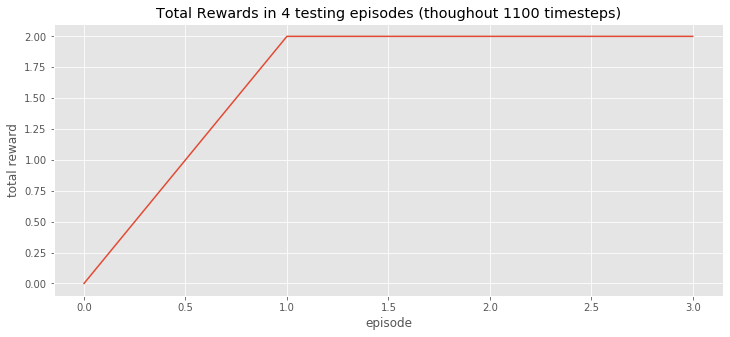

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# create figure
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)

# plot total reward history
ax.plot(train_rewards)
ax.set_xlabel('episode')
ax.set_ylabel('total reward')
ax.set_title('Total Rewards in 4 testing episodes (thoughout 1100 timesteps)')
plt.show()

In [25]:
scores_1 = dqn.test(env, nb_episodes=20, visualize=False)

Testing for 20 episodes ...
Episode 1: reward: 2.000, steps: 268
Episode 2: reward: 2.000, steps: 268
Episode 3: reward: 2.000, steps: 267
Episode 4: reward: 2.000, steps: 10000
Episode 5: reward: 2.000, steps: 250
Episode 6: reward: 0.000, steps: 171
Episode 7: reward: 2.000, steps: 246
Episode 8: reward: 3.000, steps: 310
Episode 9: reward: 2.000, steps: 266
Episode 10: reward: 0.000, steps: 166
Episode 11: reward: 2.000, steps: 10000
Episode 12: reward: 3.000, steps: 315
Episode 13: reward: 0.000, steps: 169
Episode 14: reward: 2.000, steps: 237
Episode 15: reward: 2.000, steps: 10000
Episode 16: reward: 3.000, steps: 311
Episode 17: reward: 2.000, steps: 269
Episode 18: reward: 2.000, steps: 262
Episode 19: reward: 2.000, steps: 239
Episode 20: reward: 2.000, steps: 262


In [27]:
train_rewards_1 = scores_1.history['episode_reward']

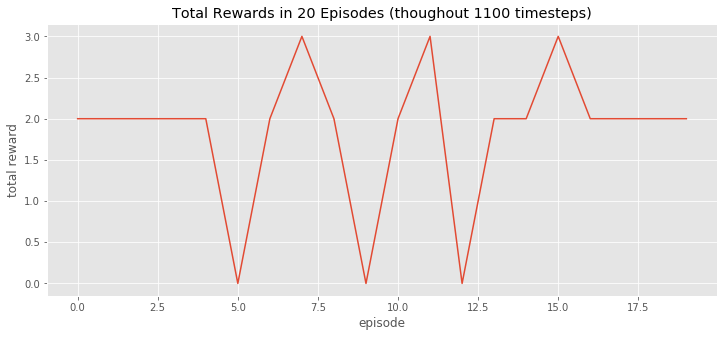

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# create figure
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)

# plot total reward history
ax.plot(train_rewards_1)
ax.set_xlabel('episode')
ax.set_ylabel('total reward')
ax.set_title('Total Rewards in 20 Episodes (thoughout 1100 timesteps)')
plt.show()

In [30]:
total_episodes = 50000        # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode
learning_rate = 0.2           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 0                   # Exploration rate
decay_rate = 0.1              # Exponential decay rate for exploration prob

In [31]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1,2,3])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:4.0
Episode:2 Score:5.0
Episode:3 Score:1.0
Episode:4 Score:2.0
Episode:5 Score:0.0
